In [1]:
import time
import numpy as np
import pandas as pd
from sklearn import datasets, neighbors, preprocessing, \
    pipeline, model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds_name = "mnist_784"
mnist = datasets.fetch_openml(ds_name)

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
split_ix = 60000
X_train_raw = X[:split_ix]
y_train = y[:split_ix]
X_test_raw = X[split_ix:]
y_test = X[split_ix:]

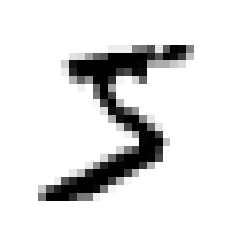

In [6]:
plot_ix = 0
plt.imshow(X_train_raw[plot_ix].reshape(28,28), cmap="binary")
plt.axis("off");

In [7]:
pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler())
])

In [8]:
X_train = pipe.fit_transform(X_train_raw)

In [30]:
knn_clf = neighbors.KNeighborsClassifier()

In [31]:
n = 10000
X_1 = X_train[:n]
y_1 = y_train[:n]

start = time.time()
knn_clf.fit(X_1, y_1)
end = time.time()
print(f"Fit took {round(end-start)} seconds on {n} rows")

Fit took 3 seconds on 10000 rows


In [20]:
n = 20000
X_1 = X_train[:n]
y_1 = y_train[:n]

start = time.time()
knn_clf.fit(X_1, y_1)
end = time.time()
print(f"Fit took {round(end-start)} seconds on {n} rows")

Fit took 8 seconds on 20000 rows


In [21]:
n = 50000
X_1 = X_train[:n]
y_1 = y_train[:n]

start = time.time()
knn_clf.fit(X_1, y_1)
end = time.time()
print(f"Fit took {round(end-start)} seconds on {n} rows")

Fit took 32 seconds on 50000 rows


In [22]:
n = 60000
X_1 = X_train[:n]
y_1 = y_train[:n]

start = time.time()
knn_clf.fit(X_1, y_1)
end = time.time()
print(f"Fit took {round(end-start)} seconds on {n} rows")

Fit took 43 seconds on 60000 rows


In [23]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [32]:
n = 10000
X_1 = X_train[:n]
y_1 = y_train[:n]


param_grid = [
    {"n_neighbors": [3, 5]},
]
cv = 3
start = time.time()
grid_search = model_selection.GridSearchCV(knn_clf, param_grid, cv=cv,
                                           verbose=5, n_jobs=-1)
grid_search.fit(X_1, y_1)
end = time.time()
print(f"Grid search took {round(end-start)} seconds")

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   40.4s remaining:   40.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min finished


Grid search took 80 seconds


In [33]:
n = 20000
X_1 = X_train[:n]
y_1 = y_train[:n]


param_grid = [
    {"n_neighbors": [3, 5]},
]
cv = 3
start = time.time()
grid_search = model_selection.GridSearchCV(knn_clf, param_grid, cv=cv,
                                           verbose=5, n_jobs=-1)
grid_search.fit(X_1, y_1)
end = time.time()
print(f"Grid search took {round(end-start)} seconds")

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  2.7min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.1min finished


Grid search took 314 seconds
